**Professor:** Enrique Garcia Ceja
**email:** enrique.gc@tec.mx

### Ariel López García A01275913



# Demo: Compare abnormal fish behaviors (oversampling and weighted model).

**Files: fishFeatures.csv**

Refer to the *fish-behaviors.pptx* presentation for details about the dataset.


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, recall_score

In [ ]:
# Path to the dataset.
filepath = "datasets/fishFeatures-4.csv"

# Read the data
dataset = pd.read_csv(filepath)

In [ ]:
dataset.head()

,id,label,f.meanSpeed,f.sdSpeed,f.minSpeed,f.maxSpeed,f.meanAcc,f.sdAcc,f.minAcc,f.maxAcc
0,id1,normal,2.623236,2.228456,0.500000,8.225342,-0.053660,1.839475,-5.532760,3.500000
1,id2,normal,5.984859,3.820270,1.414214,15.101738,-0.038705,2.660073,-7.273932,7.058594
2,id3,normal,16.608716,14.502042,0.707107,46.424670,-1.000196,12.890386,-24.320298,30.714624
3,id5,normal,4.808608,4.137387,0.500000,17.204651,-0.281815,5.228209,-12.204651,15.623512
4,id6,normal,17.785747,9.926729,3.354102,44.240818,-0.537534,11.272472,-22.178067,21.768613


In [ ]:
# remove id column
dataset = dataset.drop('id', axis=1)
dataset.head()


,label,f.meanSpeed,f.sdSpeed,f.minSpeed,f.maxSpeed,f.meanAcc,f.sdAcc,f.minAcc,f.maxAcc
0,normal,2.623236,2.228456,0.500000,8.225342,-0.053660,1.839475,-5.532760,3.500000
1,normal,5.984859,3.820270,1.414214,15.101738,-0.038705,2.660073,-7.273932,7.058594
2,normal,16.608716,14.502042,0.707107,46.424670,-1.000196,12.890386,-24.320298,30.714624
3,normal,4.808608,4.137387,0.500000,17.204651,-0.281815,5.228209,-12.204651,15.623512
4,normal,17.785747,9.926729,3.354102,44.240818,-0.537534,11.272472,-22.178067,21.768613


In [ ]:
# Count labels
dataset['label'].value_counts()

,count
label,
normal,1093
abnormal,54


In [ ]:
# Shuffle the dataset
from sklearn.utils import shuffle

seed = 1234 #set seed for reproducibility

np.random.seed(seed)

dataset = shuffle(dataset)

In [ ]:
#Select features and class
features = dataset.drop('label', axis=1)

labels = dataset[['label']]

features = features.values.astype(float)

labels = labels.values

In [ ]:
features.shape

(1147, 8)

In [ ]:
# Convert labels to integers.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels_int = le.fit_transform(labels.ravel())

In [ ]:
print(labels[0])
print(labels_int[0])

['normal']
1


In [ ]:
# One hot encode labels using the to_categorical function of keras.
labels = tf.keras.utils.to_categorical(labels_int, num_classes = 2)

In [ ]:
labels[0:10,:]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [ ]:
# Split into train and test sets.
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(features, labels,
                                                                            test_size = 0.50, random_state = 1234)

In [ ]:
# count unique values in train_labels
unique_labels, counts = np.unique(train_labels, axis=0, return_counts=True)
normal = counts[0]
abnormal = counts[1]

print("Normal: ", normal)
print("Abnormal: ", abnormal)

Normal:  547
Abnormal:  26


In [ ]:
# Normalize features between 0 and 1
# Normalization parameters are learned just from the training data to avoid information injection.
from sklearn import preprocessing

normalizer = preprocessing.StandardScaler().fit(train_features)
train_normalized = normalizer.transform(train_features)
test_normalized = normalizer.transform(test_features)

### Define the model


In [ ]:
# Define the model.
model = keras.Sequential([
    keras.layers.Dense(units = 16, input_shape=(8,), activation=tf.nn.relu),
    keras.layers.Dense(units = 8, activation=tf.nn.relu),
    keras.layers.Dense(units = 2, activation=tf.nn.softmax)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 298 (1.16 KB)

 Trainable params: 298 (1.16 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# Calculate class weights.
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
total = abnormal + normal
weight_for_0 = (1 / abnormal) * (total / 2.0)
weight_for_1 = (1 / normal) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 11.02
Weight for class 1: 0.52


In [ ]:
# Define the optimizer. Stochastic Gradient Descent in this case.
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01)

model.compile(optimizer = optimizer,
              loss = "categorical_crossentropy",
              metrics = ['accuracy'])

# Train the model.
history = model.fit(train_normalized, train_labels,
                    epochs = 100,
                    validation_split = 0.0,
                    batch_size = 256,
                    class_weight=class_weight,
                    verbose = 1)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 403ms/step - accuracy: 0.2168 - loss: 0.6789
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2406 - loss: 0.6489  
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2551 - loss: 0.6339
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2874 - loss: 0.6027  
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3208 - loss: 0.5755 
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3663 - loss: 0.5775 
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4267 - loss: 0.5508 
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4681 - loss: 0.5505 
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5116 - loss: 0.5326 
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5914 - loss: 0.5069 
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6386 - loss: 0.4821  
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6

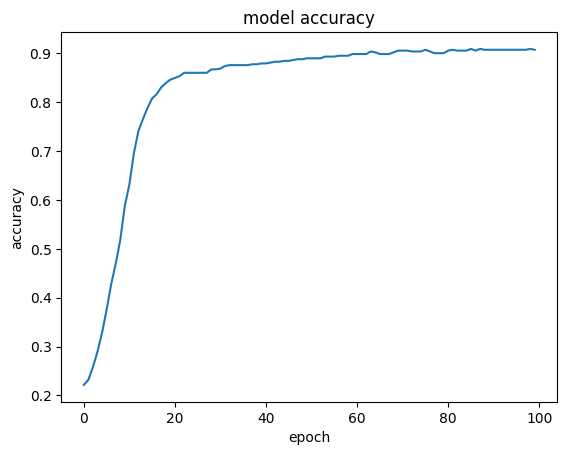

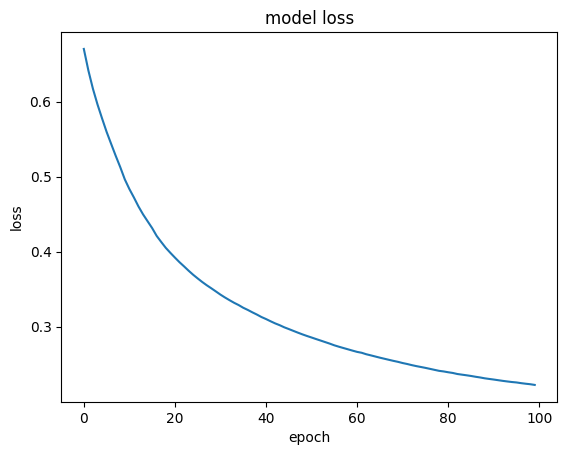

In [ ]:
# Plot accuracy and loss curves

import matplotlib.pyplot as plt
%matplotlib inline
# summarize history for accuracy
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# Evaluate the model on the test set and print the loss and accuracy.
model.evaluate(test_normalized, test_labels) # [loss, accuracy]

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9237 - loss: 0.2329


[0.2703120708465576, 0.907665491104126]

In [ ]:
# Make predictions on the test set.
predictions = model.predict(test_normalized)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


In [ ]:
# Print the first 5 predictions.
predictions[0:5]

array([[0.09209542, 0.90790457],
       [0.19984663, 0.8001534 ],
       [0.92031765, 0.07968235],
       [0.03928113, 0.96071887],
       [0.02654442, 0.97345555]], dtype=float32)

The predictions are the probabilities for each of the classes. Thus, we need to get the class with the highest probability.

In [ ]:
# Get the column index with max probability from predictions.
predictions_int = np.argmax(predictions, axis=1)

# Ground truth
true_values_int = np.argmax(test_labels, axis=1)

In [ ]:
# Convert back to strings
predictions_str = le.inverse_transform(predictions_int)

true_values_str = le.inverse_transform(true_values_int)

In [ ]:
pd.crosstab(true_values_str, predictions_str, rownames=['True labels'], colnames=['Predicted labels'])

Predicted labels,abnormal,normal
True labels,,
abnormal,24,4
normal,49,497


In [ ]:
accuracy_score(true_values_str, predictions_str)

0.9076655052264808

In [ ]:
recall_score(true_values_str, predictions_str, average=None)

array([0.85714286, 0.91025641])

# Now, train a model (without class weighting) by first oversampling the *train* data using SMOTE.

-Train a model with the same architecture as the previous one.
-Conduct your experiments below and compare the resuls between the weighted model and using SMOTE. Which method was better? Write your conclusions at the end.

In [ ]:
# YOUR CODE HERE
from imblearn.over_sampling import SMOTE

X_train = train_normalized
y_train = np.argmax(train_labels, axis=1)

smote = SMOTE(random_state=1234)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

y_train_resampled_onehot = tf.keras.utils.to_categorical(y_train_resampled, num_classes=2)



In [ ]:
model_smote = keras.Sequential([
    keras.layers.Dense(units=16, input_shape=(8,), activation=tf.nn.relu),
    keras.layers.Dense(units=8, activation=tf.nn.relu),
    keras.layers.Dense(units=2, activation=tf.nn.softmax)
])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model_smote.compile(optimizer=optimizer,
              loss="categorical_crossentropy",metrics=['accuracy'])
history_smote = model_smote.fit(X_train_resampled, y_train_resampled_onehot,
                    epochs=100,
                    validation_split=0.0,
                    batch_size=256,
                    verbose=1)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.3293 - loss: 0.9086
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6382 - loss: 0.6360  
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7546 - loss: 0.5531 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7906 - loss: 0.4993 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8054 - loss: 0.4903 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8283 - loss: 0.4719 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8306 - loss: 0.4614 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8524 - loss: 0.4441 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8681 - loss: 0.4365 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8814 - loss: 0.4323 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8712 - loss: 0.4256 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8879 - loss: 0.4205 


In [ ]:
model_smote.evaluate(test_normalized, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9413 - loss: 0.2046


[0.2500647008419037, 0.9285714030265808]

In [ ]:
predictions_smote = model_smote.predict(test_normalized)
predictions_smote_int = np.argmax(predictions_smote, axis=1)
predictions_smote_str = le.inverse_transform(predictions_smote_int)

print("Accuracy con SMOTE:", accuracy_score(true_values_str, predictions_smote_str))
print("Recall con SMOTE:", recall_score(true_values_str, predictions_smote_str, average=None))


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Accuracy con SMOTE: 0.9285714285714286
Recall con SMOTE: [0.85714286 0.93223443]


In [ ]:
pd.crosstab(true_values_str, predictions_smote_str, rownames=['True labels'], colnames=['Predicted labels'])

Predicted labels,abnormal,normal
True labels,,
abnormal,24,4
normal,37,509


# Conclusions

Podemos observar que la precisión era muy alta desde un inicio con eñ modelo aunque esto no es muy relevante cuando tenemos datos imbalanceados puesto que puede pasar algo similar a lo que vimos en clase sobre los fraudes bancarios, que mi modelo sea muy preciso pero no detecte lo que me importa, para solucionar eso utilizamos la función de recall y obtenemos nuevamente valores alto (.85 en anormales y .90 en normales) pero como queremos mejorarlos utilizamos SMOTE para generar nuevos datos sin hacer una inyección de ellos y vemos una mejora en la precisión y una mejora significativa en en la detección de casos normales, sin embargo la clase anormal no tuvo cambios importantes